In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
import itertools
from models import fc
from training import toy

In [70]:
batch_size = 1

trainset = toy.CubicToyDataset(sample_count=20)
trainloader = torch.utils.data.DataLoader(trainset, batch_size)

In [71]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    print("No cuda device available; using the CPU")
    device = torch.device("cpu")

In [80]:
nets = [nn.Sequential(nn.Linear(1, 100), nn.ReLU(), nn.Linear(100, 2)) for _ in range(1)]
for net in nets:
    optimizer = torch.optim.Adam(net.parameters())
    for epoch in range(40):
        for data, target in trainloader:
            target = target.squeeze(0)
            output = net(data)
            mean, variance = output[:,0], torch.log1p(torch.exp(output[:,1])) + 10e-6
            loss = (torch.log(variance) / 2 + torch.pow(target - mean, 2) / (2 * variance)).sum() / data.shape[0]
            print(loss)
            #loss = F.mse_loss(mean, target)
            loss.backward()
            optimizer.step()
    

tensor(565.5070, grad_fn=<DivBackward0>)
tensor(935.7455, grad_fn=<DivBackward0>)
tensor(137.3299, grad_fn=<DivBackward0>)
tensor(12.1760, grad_fn=<DivBackward0>)
tensor(19.2033, grad_fn=<DivBackward0>)
tensor(202.7284, grad_fn=<DivBackward0>)
tensor(1.2878, grad_fn=<DivBackward0>)
tensor(89.6866, grad_fn=<DivBackward0>)
tensor(70.5833, grad_fn=<DivBackward0>)
tensor(89.2752, grad_fn=<DivBackward0>)
tensor(340.0454, grad_fn=<DivBackward0>)
tensor(57.1416, grad_fn=<DivBackward0>)
tensor(297.5267, grad_fn=<DivBackward0>)
tensor(1.6622, grad_fn=<DivBackward0>)
tensor(4.8947, grad_fn=<DivBackward0>)
tensor(1130.9038, grad_fn=<DivBackward0>)
tensor(4.9660, grad_fn=<DivBackward0>)
tensor(270.9399, grad_fn=<DivBackward0>)
tensor(277.0269, grad_fn=<DivBackward0>)
tensor(312.5015, grad_fn=<DivBackward0>)
tensor(220.7546, grad_fn=<DivBackward0>)
tensor(335.5724, grad_fn=<DivBackward0>)
tensor(58.6515, grad_fn=<DivBackward0>)
tensor(8.9088, grad_fn=<DivBackward0>)
tensor(14.7557, grad_fn=<DivBack

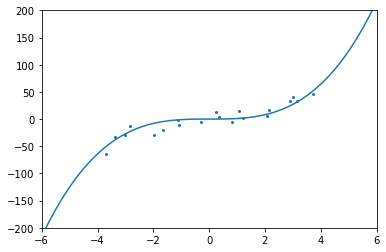

In [75]:
import matplotlib.pyplot as plt
from torchinfo import summary

plt.xlim(-6, 6)
plt.ylim(-200, 200)
xs, ys = zip(*trainset)
plt.scatter(xs, ys, s=4)
t = np.linspace(-6, 6, 50)

plt.plot(t, t**3) # Ground truth
with torch.no_grad():
    means, variances = torch.zeros(t.shape[0]), torch.zeros(t.shape[0])
    for net in nets:
        output = net(torch.from_numpy(t).unsqueeze(-1).float()).squeeze(-1)
        means += output[:,0]
        variances += output[:,1]
    means /= len(nets)
    variances /= len(nets)
    plt.plot(t, means) # Averaged predictions
#summary(nets[0], input_size=(batch_size, 1))